## Constants and imports

In [1]:
DEPTH = 15
ITER = 1500

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.svm import SVC

pd.options.display.max_columns = None
pd.options.display.max_rows = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data preprocessing

In [3]:
agent_tuned = pd.read_csv('/kaggle/input/aeroclub/request_agent_tunned.csv')
client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')
display(agent_tuned.head())
client_tuned.head()

/tmp/ipykernel_20/3306113334.py:2: DtypeWarning: Columns (3,43) have mixed types. Specify dtype option on import or set low_memory=False.
  client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')


,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivalDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 07:40:00.000,2022-06-14 08:50:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,14356,2,0,1,1,0,1,0,266,164,116,132,154,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
1,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,23712,2,1,1,1,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
2,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,21485,2,1,1,1,1,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
3,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,18212,2,1,1,2,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
4,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,17360,2,1,1,1,1,1,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN


,RequestID,RequestDate,ClientID,ClientGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivaDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,3925,1,0,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
1,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,4351,1,0,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
2,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,5925,1,1,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
3,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,6351,1,1,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
4,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,9900,1,1,2,2,1,0,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN


In [4]:
agent_tuned = agent_tuned.select_dtypes(include='int64')
client_tuned = client_tuned.select_dtypes(include='int64')
agent_tuned = agent_tuned[[n for n in agent_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
client_tuned = client_tuned[[n for n in client_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
display(agent_tuned.sample(5))
client_tuned.sample(5)

,TravellerGrade,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
140105,0,2,17100,2,1,2,2,0,1,0,176,282,194,83,5985,5416,5904,3006,1105,252,304,271,284,286,301,218,180,121,104
63017,0,2,5889,2,0,1,1,0,1,0,154,281,193,72,5660,5166,5904,3006,1105,153,303,270,175,286,301,218,180,121,104
258760,0,2,84274,0,1,2,2,0,1,0,176,315,235,157,5156,4886,5904,3006,1105,68,251,226,316,286,301,218,180,121,104
193760,0,3,109824,2,1,2,2,0,1,0,154,78,235,157,2069,1453,765,3006,1105,153,81,76,91,82,72,218,180,121,104
624762,0,1,6678,2,1,1,1,0,1,0,234,22,235,157,4388,7794,5904,3006,1105,232,24,317,344,286,301,218,180,121,104


,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
419478,5,34406,1,0,1,1,0,0,1,0,1,8,8,5,240,264,142,129,56,0,29,29,28,28,24,24,18,18,2
864598,2,12915,1,1,2,2,0,1,3,0,1,0,0,5,487,520,424,270,146,0,2,2,7,39,49,46,29,26,24
313331,2,16600,1,0,2,2,0,0,3,0,1,0,0,5,470,559,424,270,146,0,2,2,7,39,49,46,29,26,24
361052,3,33206,1,1,0,1,0,0,0,0,1,9,9,5,155,506,290,270,146,0,34,34,14,14,9,46,29,26,24
767074,2,73843,0,1,2,2,0,1,1,0,1,9,9,5,398,326,424,270,146,3,34,34,33,39,49,46,29,26,24


In [5]:
df_agent_feat = agent_tuned[[n for n in agent_tuned.columns if n not in ['SentOption', 'RequestID', 'EmployeeId', 'ClientID', 'TravellerGrade']]]
df_agent_lab = agent_tuned['SentOption']
display(df_agent_feat.sample())
df_agent_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
481031,4,151396,2,1,0,1,0,1,176,297,204,83,1766,1661,844,248,1105,68,90,85,299,246,77,66,52,121,104


574000    0
Name: SentOption, dtype: int64

In [6]:
df_client_feat = client_tuned[[n for n in client_tuned.columns if n not in ['SelectedVariant', 'RequestID', 'EmployeeId', 'ClientID', 'FrequentFlyer']]]
df_client_lab = client_tuned['SelectedVariant']
display(df_client_feat.sample())
df_client_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
785286,1,3235,1,1,2,2,1,1,1,9,15,8,158,703,424,270,146,0,34,65,42,39,49,46,29,26,24


652954    0
Name: SelectedVariant, dtype: int64

In [7]:
pd.Series(df_agent_feat.columns).compare(pd.Series(df_client_feat.columns))

,self,other


In [8]:
x = pd.concat([df_agent_feat, df_client_feat])
y = pd.DataFrame(pd.concat([df_agent_lab, df_client_lab]))
display(x.head())
display(y.head())
print(len(df_agent_feat) + len(df_client_feat))
print(len(y))

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
0,2,14356,2,0,1,1,0,1,266,164,116,132,154,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
1,2,23712,2,1,1,1,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
2,2,21485,2,1,1,1,1,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
3,2,18212,2,1,1,2,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
4,2,17360,2,1,1,1,1,1,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104


,0
0,0
1,0
2,0
3,0
4,0


1629395
1629395


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
display(x_train.head(), y_train.head())

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
265595,3,26156,1,0,1,1,0,1,1,0,0,5,214,237,105,270,146,0,2,2,28,28,9,46,29,26,24
324137,6,132217,2,1,1,1,0,1,123,58,47,57,1320,1029,523,173,24,124,14,14,86,78,50,46,14,10,24
142824,4,84146,2,1,2,2,0,1,176,231,158,83,1766,1422,661,250,1105,68,90,85,57,53,77,66,52,121,104
607263,6,43588,1,1,2,2,0,0,1,13,12,5,244,282,135,120,85,0,41,41,28,28,39,38,18,18,20
558799,4,45055,1,0,2,2,0,0,1,8,8,5,485,587,363,210,146,0,2,2,18,18,1,1,4,26,24


,0
265595,0
324137,0
142824,0
607263,0
558799,0


## Model training


In [10]:
'''
clf = CatBoostClassifier(logging_level='Silent')

params = {
    'depth': [11, 13, 15], 
    'iterations': [1000, 1500, 2000], 
    'learning_rate': [0.05, 0.1, 0.15]
}

grid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)
'''

"\nclf = CatBoostClassifier(logging_level='Silent')\n\nparams = {\n    'depth': [11, 13, 15], \n    'iterations': [1000, 1500, 2000], \n    'learning_rate': [0.05, 0.1, 0.15]\n}\n\ngrid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)\n"

In [11]:

clf = CatBoostClassifier(depth=DEPTH, iterations=ITER, logging_level='Silent')
clf.fit(x_train, y_train)
clf.save_model('aeroclub_classifier')


In [12]:
'''
clf = CatBoostClassifier()
clf.load_model('/kaggle/input/aeroclub/aeroclub_classifier')
'''

"\nclf = CatBoostClassifier()\nclf.load_model('/kaggle/input/aeroclub/aeroclub_classifier')\n"

# Metrics

In [13]:
y_pred = clf.predict(x_test)
print(y_pred[:5])
display(y_test.head())

[0 0 0 0 0]


,0
167091,0
532484,0
173311,0
87823,0
927595,0


In [14]:
print(m.classification_report(y_test, y_pred, target_names = ['Not choosed', 'Choosed']))

              precision    recall  f1-score   support

 Not choosed       0.99      1.00      0.99    320086
     Choosed       0.51      0.22      0.31      5793

    accuracy                           0.98    325879
   macro avg       0.75      0.61      0.65    325879
weighted avg       0.98      0.98      0.98    325879



In [15]:
print(m.roc_auc_score(y, clf.predict_proba(x)[:, 1]))

0.9779778929359417


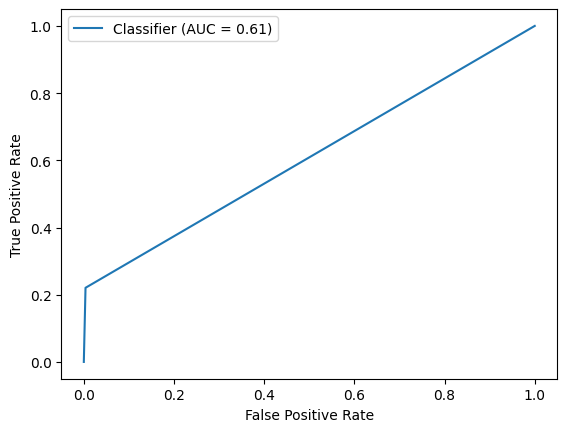

In [16]:
m.RocCurveDisplay.from_predictions(y_test, y_pred)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()